<a href="https://colab.research.google.com/github/rsudiplive/Understanding-Linear-Regression_BostonHousing/blob/main/BostonHousing_EDA_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Copy of housing.csv')

In [ ]:
df_boston.head(8)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
5,0.08829 12.50 7.870 0 0.5240 6.0120 66...
6,0.14455 12.50 7.870 0 0.5240 6.1720 96...
7,0.21124 12.50 7.870 0 0.5240 5.6310 100...


In [ ]:
df_boston.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [ ]:
for index,row in df_boston.iterrows():
  print(index)
  print(row)
  if index>7:
    break

0
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.02731   0.00   7.070  0  0.4690  6.4210  78...
Name: 0, dtype: object
1
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.02729   0.00   7.070  0  0.4690  7.1850  61...
Name: 1, dtype: object
2
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.03237   0.00   2.180  0  0.4580  6.9980  45...
Name: 2, dtype: object
3
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.06905   0.00   2.180  0  0.4580  7.1470  54...
Name: 3, dtype: object
4
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.02985   0.00   2.180  0  0.4580  6.4300  58...
Name: 4, dtype: object
5
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00     0.08829  12.50   7.870

In [ ]:
#lets define the column name present in the excel
df_boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Copy of housing.csv',names=['A'])

In [ ]:
df_boston.head(5)

,A
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [ ]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [ ]:
for index,row in df_boston.iterrows():
  print(row)
  if index>5:
    break

A     0.00632  18.00   2.310  0  0.5380  6.5750  65...
Name: 0, dtype: object
A     0.02731   0.00   7.070  0  0.4690  6.4210  78...
Name: 1, dtype: object
A     0.02729   0.00   7.070  0  0.4690  7.1850  61...
Name: 2, dtype: object
A     0.03237   0.00   2.180  0  0.4580  6.9980  45...
Name: 3, dtype: object
A     0.06905   0.00   2.180  0  0.4580  7.1470  54...
Name: 4, dtype: object
A     0.02985   0.00   2.180  0  0.4580  6.4300  58...
Name: 5, dtype: object
A     0.08829  12.50   7.870  0  0.5240  6.0120  66...
Name: 6, dtype: object


In [ ]:
#creating a list of lists of all the rows 
rows=[]
for i,row in df_boston.iterrows():
  rows.append(list(row['A'].split()))
  
print(rows)


[['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00'], ['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60'], ['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70'], ['0.03237', '0.00', '2.180', '0', '0.4580', '6.9980', '45.80', '6.0622', '3', '222.0', '18.70', '394.63', '2.94', '33.40'], ['0.06905', '0.00', '2.180', '0', '0.4580', '7.1470', '54.20', '6.0622', '3', '222.0', '18.70', '396.90', '5.33', '36.20'], ['0.02985', '0.00', '2.180', '0', '0.4580', '6.4300', '58.70', '6.0622', '3', '222.0', '18.70', '394.12', '5.21', '28.70'], ['0.08829', '12.50', '7.870', '0', '0.5240', '6.0120', '66.60', '5.5605', '5', '311.0', '15.20', '395.60', '12.43', '22.90'], ['0.14455', '12.50', '7.870', '0', '0.5240', '6.1720', '96.10', '5.9505', '5', '311.0', '15.20', '396.90', '19.15', '27.10'], ['

In [ ]:
#list(map(float, mylist)
rows=[]
for i,row in df_boston.iterrows():
  rows.append(list(map(float,row['A'].split())))

print(rows)

[[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0], [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 1

In [ ]:
df_boston1=pd.DataFrame(data=rows,columns=columns) #back to original boston dataset
df_boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


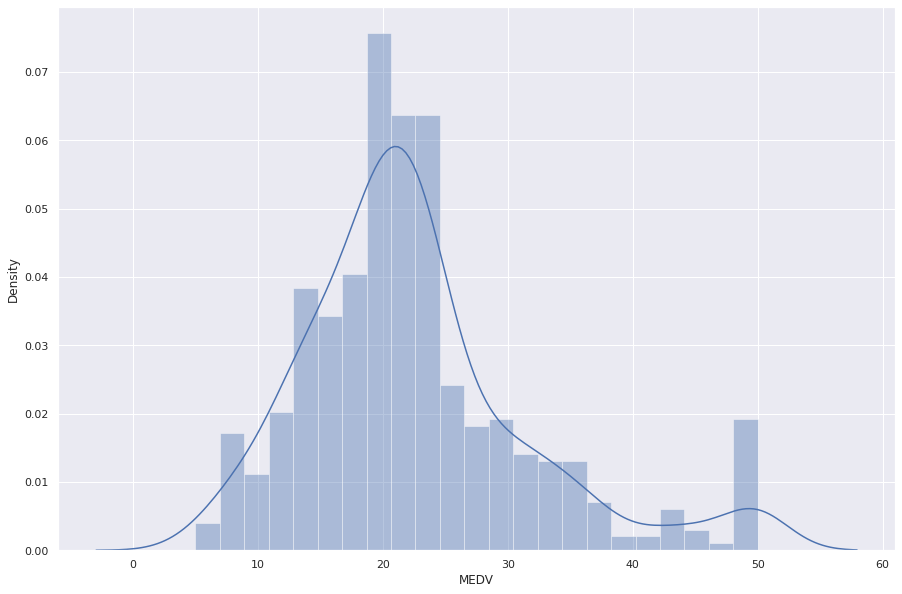

In [ ]:
#let's check the distribution of MEDV dependent variable

sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df_boston1['MEDV'])
plt.show()

In [ ]:
#the distribution of MEDV has a normal distribution with slightly right skewed
#lets also check the summary statistics

In [ ]:
df_boston1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


*   The average per capita crime rate by town is 3.61
*   There are a min of 0.4 and a max of 27.7 acres of proportion of non-retail business acres per town with an average of 11 acres proportion of non-retail business!
*   The average nitric oxides concentration (parts per 10 million) is around 55% while a town with least NOX is 38% and maximum a town reaches to a level of 87%
* The average number of rooms per dwelling is 6 and at max it ranges to 8 rooms/per person.
*  The full-value property-tax rate has an average of USD 408/10,000
*  The average pupil to teacher ratio is 1:18
*  An average of 12.6% constitutes the lower status of the population with atleast 1.73% belongs to lower status and a max of 40% belongs to this group in a town.












*We create a correlation matrix that measures the linear relationships between the variables.*

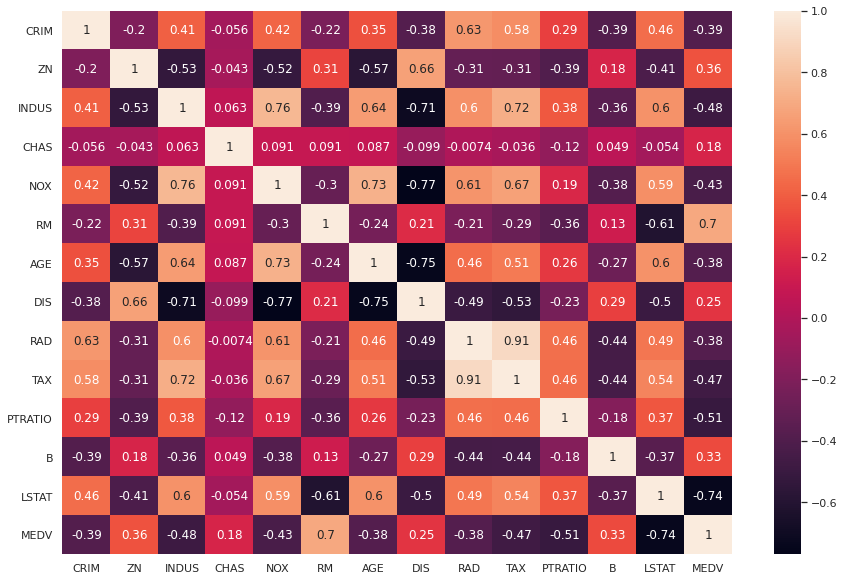

In [ ]:
df_boston_corr = df_boston1.corr()
sns.heatmap(data=df_boston_corr, annot=True)

In [ ]:
#If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

let's take a look into the relationships between the variables and price. In order to create a linear model, the predictors or features that we use must have a linear relationship to price. <br>

Also, to fit a linear regression model, we select only those features which have a high correlation with the dependent variable(MEDV here). One more point which comes the concept of **multicollinearity**, the features **RAD**, **TAX** have a correlation of 0.91. These feature pairs are strongly correlated to each other. If in future, we fit this model, we'll not use these features while training!

*Let's understand the relationship!*

By looking at the correlation matrix, we can infer that **RM** is highly correlated(strong positive correlation~0.7) with **MEDV**. While **LSTAT** is highly negetively correlated(-0.74) with the dependent variable **MEDV** <br>

Also CRIM(-ve corr), INDUS(-ve corr), NOX(-ve corr), TAX(-ve corr), PTRATIO(-ve corr), B(+ve corr) shows some correlation between the dependent variable as well. 


**Let's check for linearity using scatterplots to understand about the relationship of RM and LSTAT with MEDV**

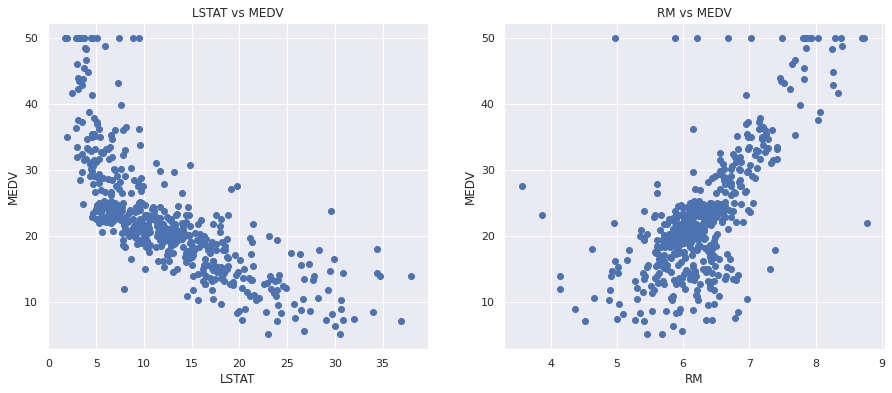

In [ ]:
plt.figure(figsize=(15, 6))

features = ['LSTAT', 'RM']
target = df_boston1['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_boston1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col+' vs MEDV')
    plt.xlabel(col)
    plt.ylabel('MEDV')

We can clearly infer that with the increase in the value of RM(average number of rooms per dwelling), the MEDV/price also increases linearly. Also the prices tends to decrease(/increase) with the increase(/decrease) in LSTAT(consiting of lower status population). 

***Line of best fit with the distribution of data!***

# RM & MEDV(+vely correlated)

Text(0.5, 1.0, 'Relationship between RM and MEDV')

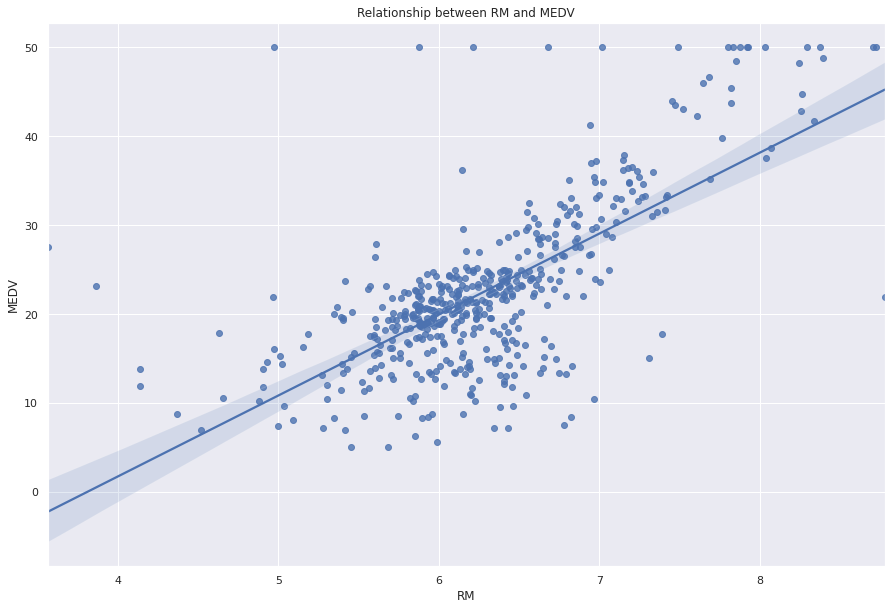

In [ ]:
sns.regplot(y="MEDV", x="RM", data=df_boston1, fit_reg = True)
plt.title("Relationship between RM and MEDV")

# LSTAT & MEDV(-vely correlated)

Text(0.5, 1.0, 'Relationship between LSTAT and MEDV')

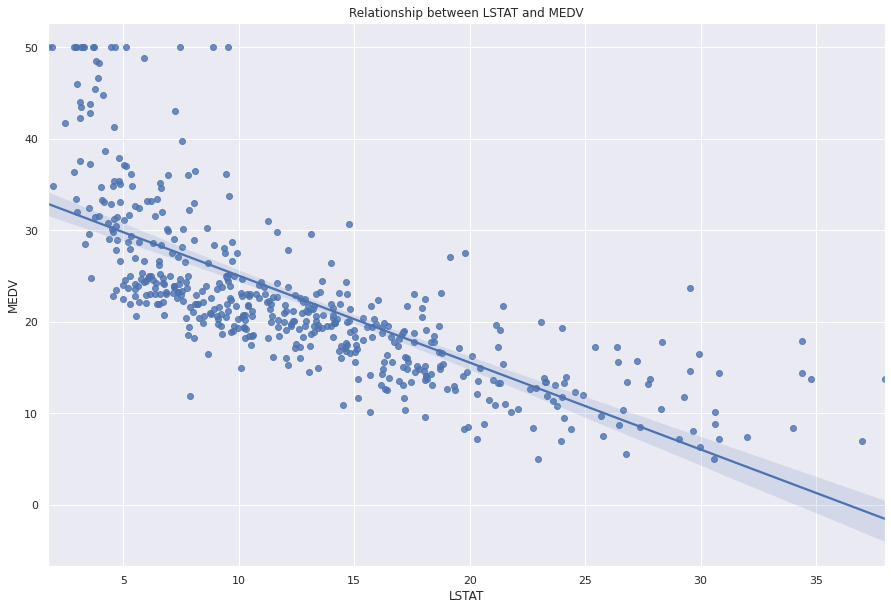

In [ ]:
sns.regplot(y="MEDV", x="LSTAT", data=df_boston1, fit_reg = True)
plt.title("Relationship between LSTAT and MEDV")

Lets also look at the linear relationship between **NOX(nitric oxides concentration) vs MEDV**(dependent variable/price of houses)

Text(0.5, 1.0, 'Relationship between NOX and MEDV')

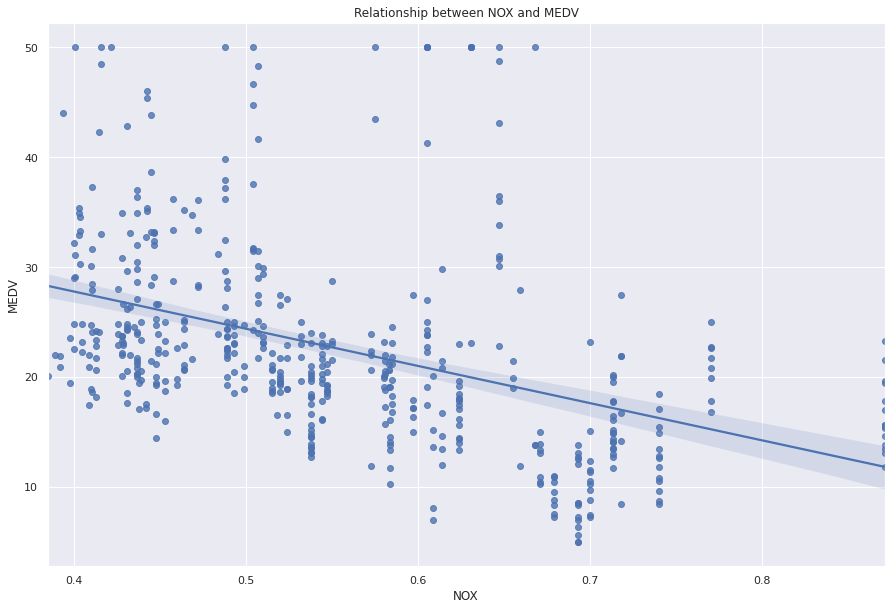

In [ ]:
sns.regplot(y="MEDV", x="NOX", data=df_boston1, fit_reg = True)
plt.title("Relationship between NOX and MEDV")

This clearly indicates with the increase/decrease in NOX the MEDV/prices decreases/increases respectively(-vely correlated)

Relationship between **TAX** and **MEDV**:



Text(0.5, 1.0, 'Relationship between TAX and MEDV')

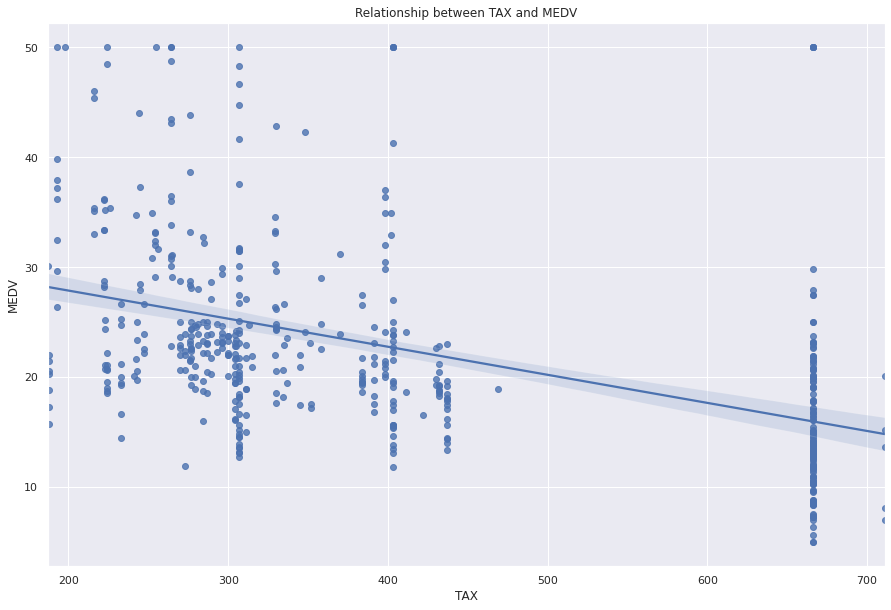

In [ ]:
sns.regplot(y="MEDV", x="TAX", data=df_boston1, fit_reg = True)
plt.title("Relationship between TAX and MEDV")

Looking at the distribution and the best fit line it also shows a negetive correlation with the dependent variable MEDV.

Let's also have an idea of **DIS** which is the weighted distances to five Boston employment centres with **MEDV**. From the correlation matrix, it shows a **positive correlation** with the price of the houses. Lets look at the best fit line and the distribution below:

Text(0.5, 1.0, 'Relationship between DIS and MEDV')

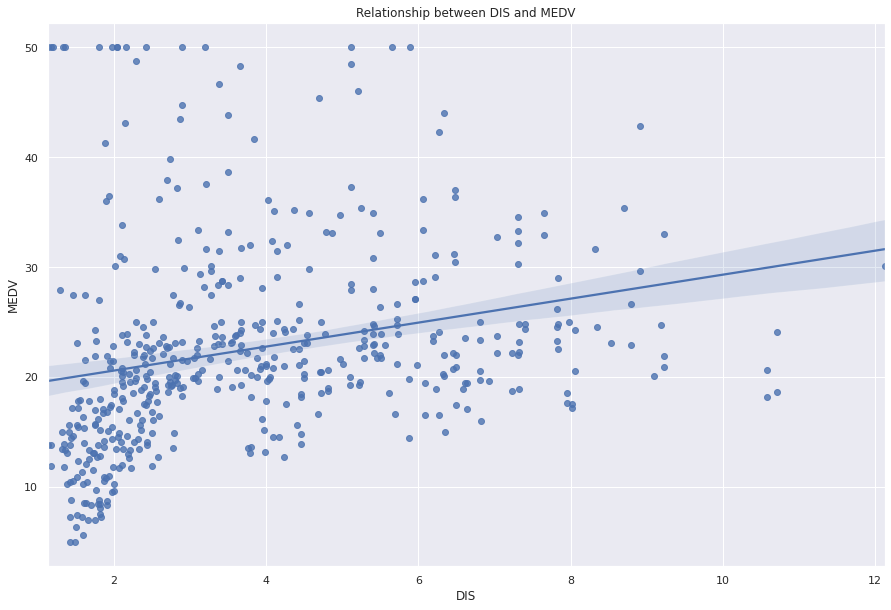

In [ ]:
sns.regplot(y="MEDV", x="DIS", data=df_boston1, fit_reg = True)
plt.title("Relationship between DIS and MEDV")

So, we got the distribution and the best fit accordingly with what we concluded from the correlation matrix. It gives us a better understanding that with the increase in the distances to five Boston employment centres, the MEDV also increases linearly as per the plot above.

Let's also look at the relationship between **Crime rate(CRIM)** and **price(MEDV)**

**Distribution of MEDV:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


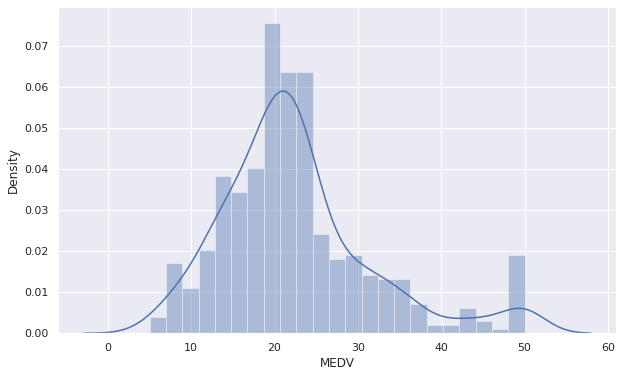

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df_boston1['MEDV'],hist=True)

The distribution of **MEDV**/dependent variable shows a normal distribution which is a good sign for training the model later.

**Distribution of CRIM:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


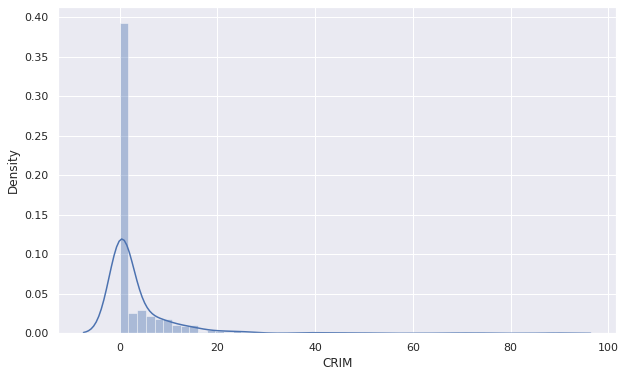

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df_boston1['CRIM'],hist=True)

The distribution of **CRIM** looks rightly skewed and having high range outliers

Now Let's have a look at the scatterplot between the two: CRIM and MEDV to check the relationship between them.

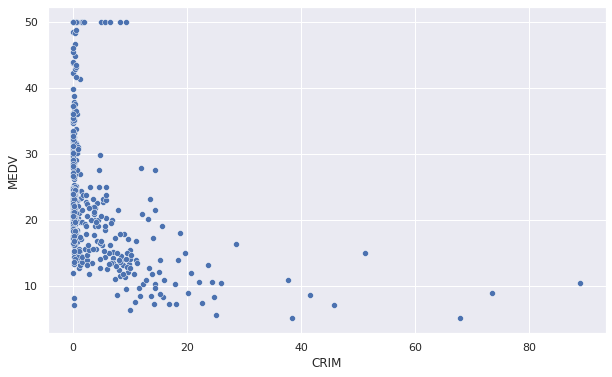

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_boston1, x="CRIM", y="MEDV")

From the above graph, we can clearly see that the distribution(exp) of CRIM(per capita crimes in town) *decays exponentially* with the price(MEDV) 

Taking the log of the data helps to normalize the data(scaling to log-normal distribution also can be called as a normal approximation)

Text(0.5, 1.0, 'Scaled Crime Rate vs. Prices')

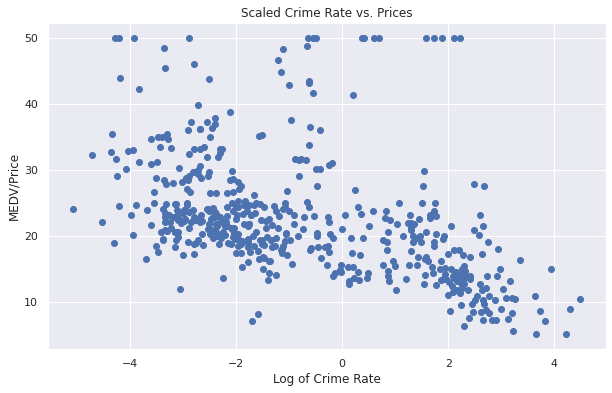

In [ ]:
plt.figure(figsize=(10, 6))
x = np.log(df_boston1['CRIM'])
plt.scatter(x, df_boston1['MEDV'])

plt.xlabel("Log of Crime Rate")
plt.ylabel("MEDV/Price")
plt.title("Scaled Crime Rate vs. Prices")

Let's now check the distribution as well:

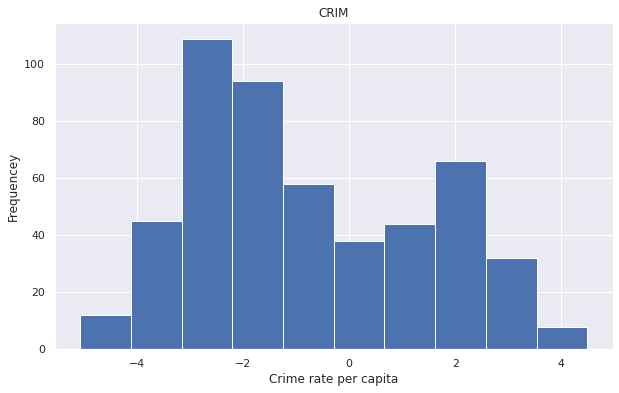

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df_boston1.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Now the crime rate after scaling possess a **normal distribution**

Distribution of RM:

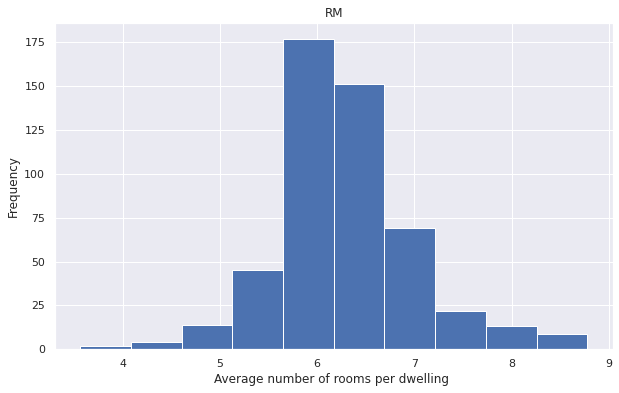

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston1.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling ")
plt.ylabel("Frequency")
plt.show()

Distribution of LSTAT:

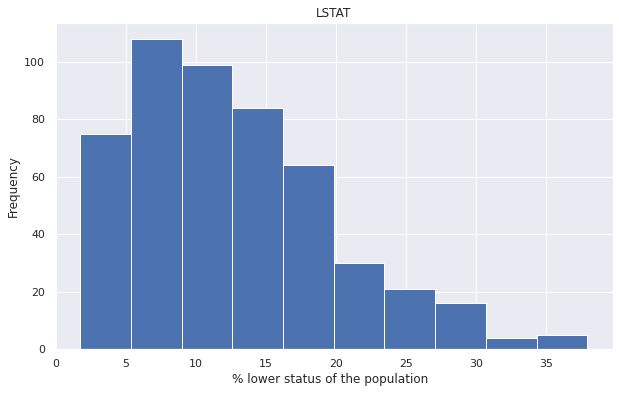

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston1.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population  ")
plt.ylabel("Frequency")
plt.show()

Distribution of TAX:

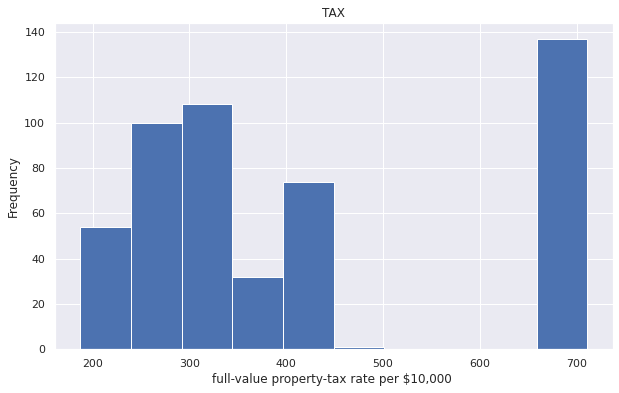

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston1.TAX)
plt.title("TAX")
plt.xlabel("full-value property-tax rate per $10,000 ")
plt.ylabel("Frequency")
plt.show()

Distribution of NOX:

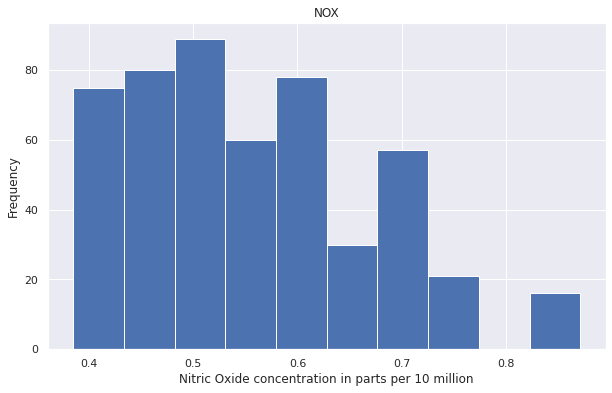

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_boston1.NOX)
plt.title("NOX")
plt.xlabel("Nitric Oxide concentration in parts per 10 million")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#contributed by Sudip Roy